# Credit EDA Assignment 

## Problem Statement

### Business Objectives

This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough.

# Process followed to perform the EDA


### Step by step process on the application_data dataset analysis. 

- Understnad the dataset by loading & performing various action.
- Identify the missing values in the colums. 
- Drop the columns where the values are missing more in significant % (Note - 40% is my threshold value)
- Drop the columns which do not add any value to the analysis. (this will make my dataset lighter)
- I will find out the data imbalance ratio
- Identify the outliers and should be mindful about them. 
- Perfom the analysis. Pick 5 variables/attributes and perform the univariate, bivariate & segmented univariate analysis. 
- I will do this analysis for 20-25 columns in loop fashion by selecting 5 variable/attribites at a time. viz., Analysis 1, Analysis 2, Analysis 3, Analysis 4, Analysis 5. 
- I will find out the corralation between the top 5 driving variable/attributes along with the Target variable. 


##### The findings are mentioned after every analysis. 

### Step by step process on the previous_data dataset analysis. 

- Understnad the dataset by loading & various action. 
- Identify the missing values in the colums. 
- Drop the columns where the values are missing more than 40%.(40% is my threshold value)
- Drop the columns which do not add any value to the analysis. (this will make my dataset lighter)
- Identify the outliers and should be mindful about them. 
- Perfom the analysis. Pick 5 variables/attributes and perform the univariate, bivariate & segmented univariate analysis. 

##### The findings are mentioned after every analysis. 

### application_data dataset analysis. 

In [1]:
#importing all the necessary librabries from python wgich are required for analysis

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Understnad the dataset by loading & performing various action.

In [2]:
#Reading the csv file. 

application_data=pd.read_csv('/Users/saisharan/Downloads/application_data - risk analysis.csv')
application_data.shape

(307511, 122)

In [3]:
#glance at the table using Head().

application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#glance at the size of the table using shape function.

application_data.shape

(307511, 122)

In [5]:
#check for the duplicates in the data set.

application_data.duplicated().sum()

0

In [6]:
#check out the data set attributes & null values using the info() function.

application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


#### Identify the missing values in the colums. 

In [7]:
#check for the null % in all the columns. 

application_data.isna().sum()/307511*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

- As I can notice there are many columns with missing data upto 60 -70%. I a going to have a threshold of 40% and drop the columns containing more than 40% of null values.

In [8]:
#calculating the 40% of the rows.

123020/307511*100

40.00507298925892

In [9]:
#calculating the threshold number of the rows.

307511-123020

184491

In [10]:
#dropping the columns containing more than 40% of missing values 

application=application_data.dropna(thresh=184491, axis=1)

In [11]:
#glance at the size of the table using shape function.

application.shape

(307511, 73)

In [12]:
#check out the data set attributes & null values using the info() function.

application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

- If you notice the data dictionary (columns dictionary) you will find that 'FLAG_DOCUMENT' & 'SOCIAL_CIRCLE' columns do not add value to our analysis. Let's drop them.

In [13]:
#drop the columns of flag document series & social circle series.

application=application.drop("FLAG_DOCUMENT_2", axis=1)
application=application.drop("FLAG_DOCUMENT_3", axis=1)
application=application.drop("FLAG_DOCUMENT_4", axis=1)
application=application.drop("FLAG_DOCUMENT_5", axis=1)
application=application.drop("FLAG_DOCUMENT_6", axis=1)
application=application.drop("FLAG_DOCUMENT_7", axis=1)
application=application.drop("FLAG_DOCUMENT_8", axis=1)
application=application.drop("FLAG_DOCUMENT_9", axis=1)
application=application.drop("FLAG_DOCUMENT_10", axis=1)
application=application.drop("FLAG_DOCUMENT_11", axis=1)
application=application.drop("FLAG_DOCUMENT_12", axis=1)
application=application.drop("FLAG_DOCUMENT_13", axis=1)
application=application.drop("FLAG_DOCUMENT_14", axis=1)
application=application.drop("FLAG_DOCUMENT_15", axis=1)
application=application.drop("FLAG_DOCUMENT_16", axis=1)
application=application.drop("FLAG_DOCUMENT_17", axis=1)
application=application.drop("FLAG_DOCUMENT_18", axis=1)
application=application.drop("FLAG_DOCUMENT_19", axis=1)
application=application.drop("FLAG_DOCUMENT_20", axis=1)
application=application.drop("FLAG_DOCUMENT_21", axis=1)
application=application.drop('DEF_30_CNT_SOCIAL_CIRCLE', axis=1)
application=application.drop('OBS_30_CNT_SOCIAL_CIRCLE', axis=1)
application=application.drop('DEF_60_CNT_SOCIAL_CIRCLE', axis=1)
application=application.drop('OBS_60_CNT_SOCIAL_CIRCLE', axis=1)


In [14]:
#check the shape of the dataset

application.shape

(307511, 49)

In [15]:
#check the entire of the dataset using info function.

application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 49 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

#### Data Imbalance Ratio

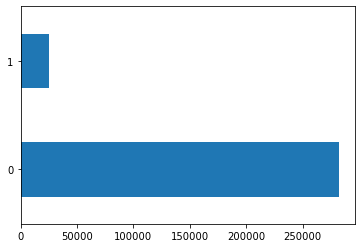

In [16]:
#Visualise the difference between defaulter(1) & non - defaulters (0)

application.TARGET.value_counts().plot.barh()
plt.show()

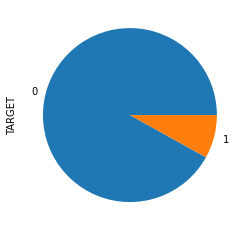

In [17]:
#Visualise the difference between defaulter(1) & non - defaulters (0) in % terms. 

application.TARGET.value_counts(normalize=True).plot.pie()
plt.show()

In [18]:
#finding out the % of defaulter(1) & non - defaulters (0).

application.TARGET.value_counts(normalize=True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

In [19]:
#The ratio of data imbalance

Data_Imbalance_Ratio=91.927118/ 8.072882

In [20]:
#Display the data imbalance ratio

Data_Imbalance_Ratio

11.387149967013018

#### Identifying the outliers.

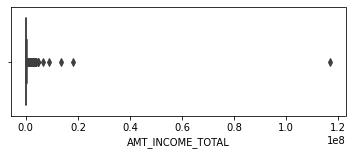

In [21]:
#Checking if there are any outliers in the AMT_INCOME_TOTAL (client's income)

plt.figure(figsize=[6,2])
sns.boxplot(application.AMT_INCOME_TOTAL )
plt.show()

In [22]:
#the above has an one outlier which is very far away from the data. 
#if we can get rid of that one, it will help us in better analysis.
#let's understand the difference between different quantiles of the data.

application.AMT_INCOME_TOTAL.quantile([0.25, 0.5, 0.75,0.9,0.95,0.99])

0.25    112500.0
0.50    147150.0
0.75    202500.0
0.90    270000.0
0.95    337500.0
0.99    472500.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [23]:
application.AMT_INCOME_TOTAL.max()

117000000.0

In [24]:
#As we can notice that there is a huge difference between max income & the 99%ile of the data. 
#We can omit the data above 99%ile.

application.NEWINCOME=application[application.AMT_INCOME_TOTAL<472500.0]

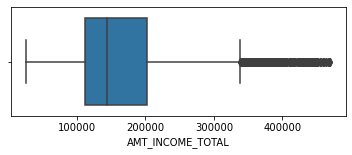

In [25]:
#Let's plot the Income box plot again. 

plt.figure(figsize=[6,2])
sns.boxplot(application.NEWINCOME.AMT_INCOME_TOTAL)
plt.show()

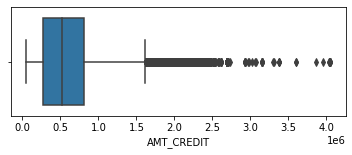

In [26]:
#Let's boxplot & analyse the AMT_CREDIT to check for outliers. 

plt.figure(figsize=[6,2])
sns.boxplot(application.AMT_CREDIT)
plt.show()

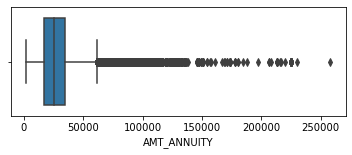

In [27]:
#The above AMT_CREDIT has a few outliers but seems to be not completely irrelevent. 
#Let's not treat it but let's be mind of it. 

#Let's boxplot & analyse the AMT_ANNUITY to check for outliers.

plt.figure(figsize=[6,2])
sns.boxplot(application.AMT_ANNUITY)
plt.show()

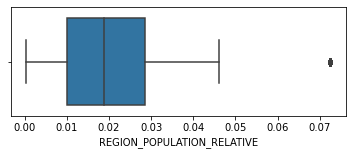

In [28]:
#The above AMT_ANNUITY has a few outliers but seems to be not completely irrelevent. 
#Let's not treat it but let's be mind of it. 

#Let's boxplot & analyse the Relative population to check for outliers.
plt.figure(figsize=[6,2])
sns.boxplot(application.REGION_POPULATION_RELATIVE)
plt.show()

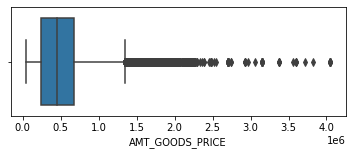

In [29]:
#the Relative population seems good except one outlier. Let's be mindful about it. 

#Let's boxplot & analyse the Goods Price to check for outliers.
plt.figure(figsize=[6,2])
sns.boxplot(application.AMT_GOODS_PRICE)
plt.show()

In [30]:
#The above GOODs price plot seems to have a few outliers. Let's not treat it. Let's be mindful about it. 

#Let's analyse the DAYS_BIRTH (age) column. 
application.DAYS_BIRTH.head()

0    -9461
1   -16765
2   -19046
3   -19005
4   -19932
Name: DAYS_BIRTH, dtype: int64

In [31]:
#The age column seems to have negative values. Let's take the absoloute values and convert them to years.

application.DAYS_BIRTH=application.DAYS_BIRTH.abs()

In [32]:
#Converting them into years and adding them to a new column.

application.AGE=application.DAYS_BIRTH/365

In [33]:
#Let's check the age column now. 
application.AGE.head()

0    25.920548
1    45.931507
2    52.180822
3    52.068493
4    54.608219
Name: DAYS_BIRTH, dtype: float64

In [34]:
#The age column has been fixed. Let's check the work experience column through DAYS_EMPLOYED. 

application.DAYS_EMPLOYED.head()

0    -637
1   -1188
2    -225
3   -3039
4   -3038
Name: DAYS_EMPLOYED, dtype: int64

In [35]:
#The work experience column seems to have negative values. Let's take the absoloute values and convert them to years.

application.DAYS_EMPLOYED=application.DAYS_EMPLOYED.abs()

In [36]:
#Converting them into years and adding them to a new column.

application.WORKEX=application.DAYS_EMPLOYED/365

In [37]:
application.WORKEX.head()

0    1.745205
1    3.254795
2    0.616438
3    8.326027
4    8.323288
Name: DAYS_EMPLOYED, dtype: float64

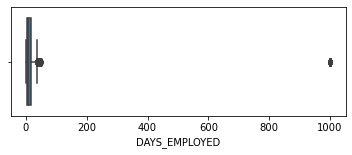

In [38]:
#let's check outliers for Worex column.

plt.figure(figsize=[6,2])
sns.boxplot(application.WORKEX)
plt.show()

In [39]:
#the above has an one outlier which is very far away from the data. 
#if we can get rid of that one, it will help us in better analysis.
#let's understand the max of the days employed data.

application.DAYS_EMPLOYED.max()

365243

In [40]:
#let's understand the difference between different quantiles of the data.
application.DAYS_EMPLOYED.quantile([0.8, 0.9])

0.8      9188.0
0.9    365243.0
Name: DAYS_EMPLOYED, dtype: float64

In [41]:
#lets eliminate the outlier at 90th%ile. 

application.NEW_WORKEX=application[application.DAYS_EMPLOYED<=9188.0]

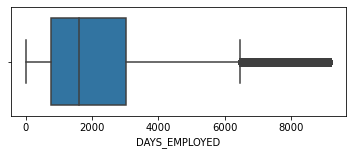

In [42]:
#let's check outliers for the NEW days employed column.

plt.figure(figsize=[6,2])
sns.boxplot(application.NEW_WORKEX.DAYS_EMPLOYED)
plt.show()

### Analysis 1

#### Univariate Analysis

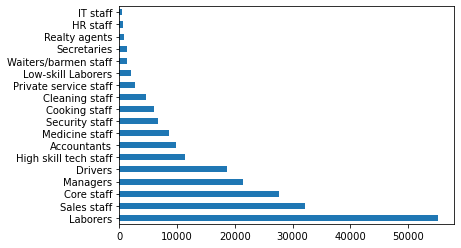

In [43]:
#Let's plot occupation types attribute to get insights. 

application.OCCUPATION_TYPE.value_counts().plot.barh()
plt.show()

- The above gives us an insight that the top 5 occupations are Labourers, Sales staff, Core staff, Managers & Drivers. These are the most people Who are likely to apply for the loan in majority. 

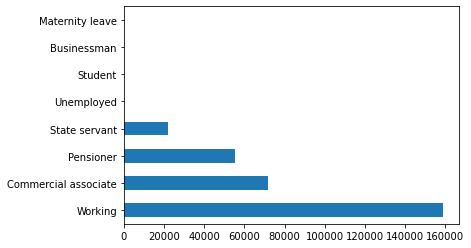

In [44]:
#Let's plot income types attribute to get insights. 

application.NAME_INCOME_TYPE.value_counts().plot.barh()
plt.show()


- The above gives us an insight there are mostly 4 income types. Majority are working class. 

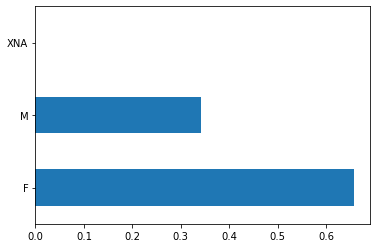

In [45]:
#Let's plot gender attribute to get insights. 

application.CODE_GENDER.value_counts(normalize=True).plot.barh()
plt.show()

- The female applications are more in number than male. This is an interesting insight.

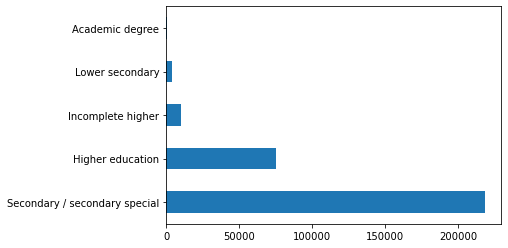

In [46]:
#Let's plot education types attribute to get insights. 

application.NAME_EDUCATION_TYPE.value_counts().plot.barh()
plt.show()

- the top education types are secondary & higher. Majority of them seems like to gave good education.

### Analysis 1

#### Bivariate Analysis.

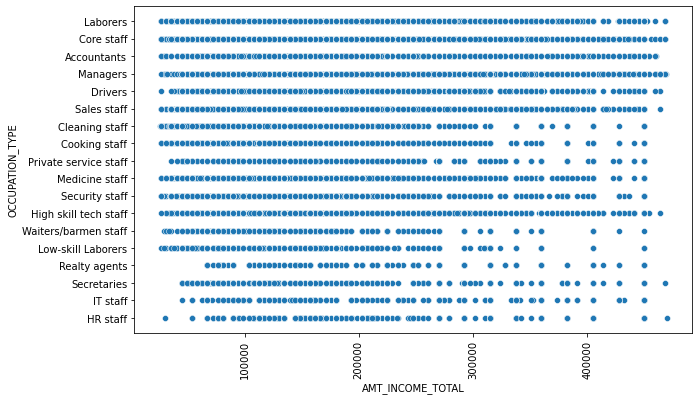

In [47]:
#Let's compare the types of the occupation with their incomes. 
#This will tell us which occupation gorup has the what kind of incomelevels.

plt.figure(figsize=[10,6])
sns.scatterplot(application.NEWINCOME.AMT_INCOME_TOTAL, application_data.OCCUPATION_TYPE)
plt.xticks(rotation=90)
plt.show()

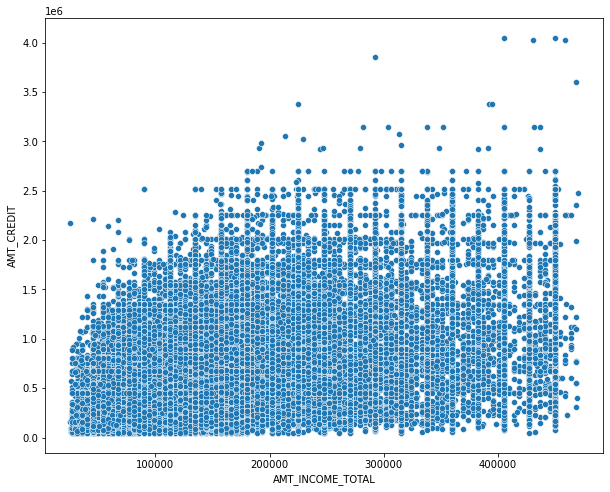

In [48]:
#Let's compare the incomes with their loan amount. 
#This will tell us how the loan amount will vary based on the income-levels.

plt.figure(figsize=[10,8])
sns.scatterplot(application.NEWINCOME.AMT_INCOME_TOTAL, application_data.AMT_CREDIT)
plt.show()

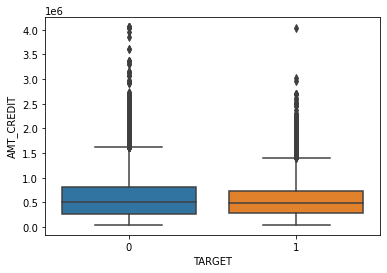

In [49]:
#let us understand the loan amounts spreads for defaulters(1) & non-defaulters(0). 

sns.boxplot(application_data.TARGET, application_data.AMT_CREDIT)
plt.show()

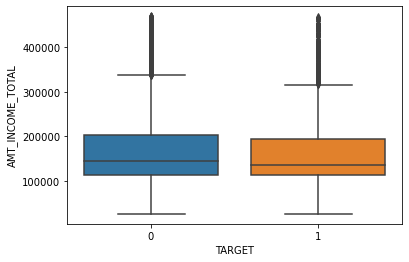

In [50]:
#let us notice the income levels of the defaulters & non-defaulters.

sns.boxplot(application_data.TARGET, application.NEWINCOME.AMT_INCOME_TOTAL)
plt.show()

### Analysis 1

#### Sgemented Analysis

In [51]:
#Create the segmented dataframe of defaulters.

application1=application[application.TARGET==1]

In [52]:
#check the count of the defaulters.

application1.TARGET.value_counts()

1    24825
Name: TARGET, dtype: int64

In [53]:
#Create the segmented dataframe of non-defaulters.

application0=application[application.TARGET==0]

In [54]:
#check the count of the non-defaulters.

application0.TARGET.value_counts()

0    282686
Name: TARGET, dtype: int64

In [55]:
#Create the segmented dataframe of defaulters from the NEW Income dataframe (to understand the defaulters income range.)
#This cannot be achecived using the origianl data frame 'APPLICATION' as it contains income outliers. 

application.NEWINCOME1=application.NEWINCOME[application.NEWINCOME.TARGET==1]

In [56]:
#check the count of the defaulters.

application.NEWINCOME1.TARGET.value_counts()

1    24657
Name: TARGET, dtype: int64

In [57]:
#Create the segmented dataframe of non-defaulters.

application.NEWINCOME0=application.NEWINCOME[application.NEWINCOME.TARGET==0]

In [58]:
#check the count of the non-defaulters.

application.NEWINCOME0.TARGET.value_counts()

0    279760
Name: TARGET, dtype: int64

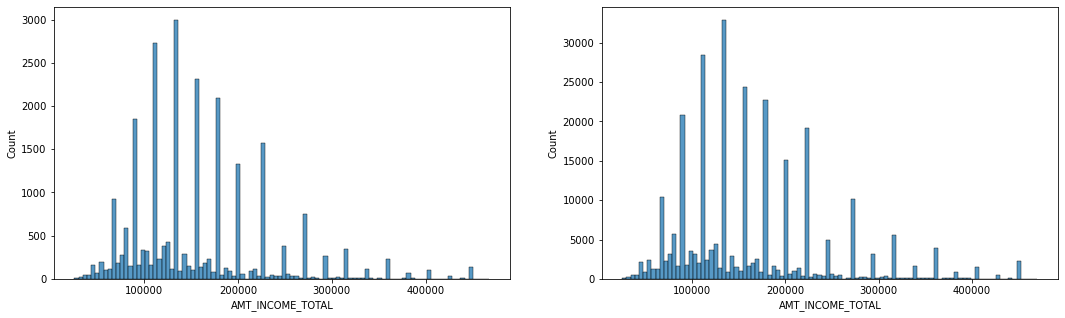

In [59]:
#plotting the distributions of the income levels for the defaulters & non-defaulters


plt.figure(figsize=[18,5])
plt.subplot(1,2,1)
sns.histplot(application.NEWINCOME1.AMT_INCOME_TOTAL, bins=100)
plt.subplot(1,2,2)
sns.histplot(application.NEWINCOME0.AMT_INCOME_TOTAL, bins=100)
plt.show()

- The above clearly shows that, most of the defaulters(left side graph) income levels are less than 2,50,000. 

### analysis 2 

#### Univariate Analysis

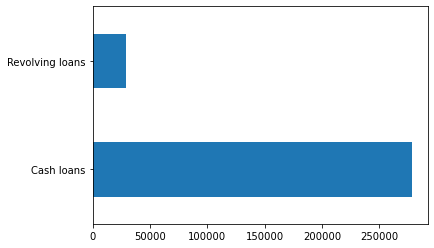

In [60]:
#Let's plot the types of loan contracts attribute to get insights. 

application.NAME_CONTRACT_TYPE.value_counts().plot.barh()
plt.show()

- From the above, most of the loan types  are cash loans.

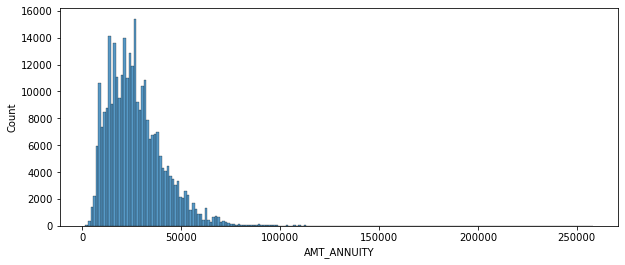

In [61]:
#Let's plot the annuity attribute to get insights. 

plt.figure(figsize=[10,4])
sns.histplot(application.AMT_ANNUITY, bins=200)
plt.show()

- The majority of the annuity amount is less than 50,000.

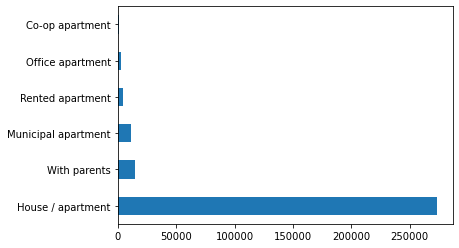

In [62]:
#Let's plot the types of housing attribute to get insights. 


application.NAME_HOUSING_TYPE.value_counts().plot.barh()
plt.show()

- The above clearly shows that majority of the housing type is 'Housing/Apartment'

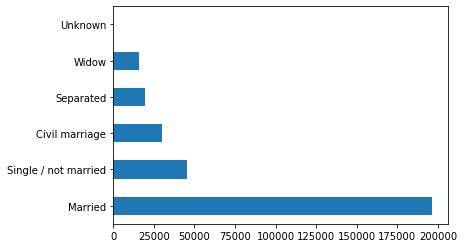

In [63]:
#Let's plot the family status of the applicants attribute to get insights. 

application.NAME_FAMILY_STATUS.value_counts().plot.barh()
plt.show()

- The above clearly shows that majority of the applicants family status is 'Married'or 'Single'

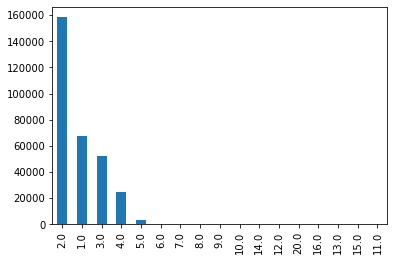

In [64]:
#Let's plot the number of family members of the applicants attribute to get insights. 

application.CNT_FAM_MEMBERS.value_counts().plot.bar()
plt.show()

### Analysis 2

#### Bivariate Analysis

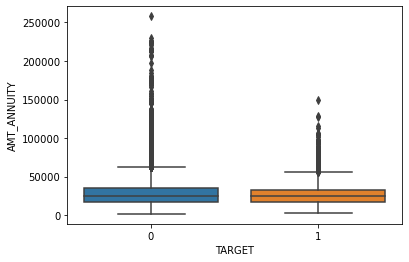

In [65]:
#Let's check the annuity spread of the defaulters(1) & non-defaulters(0)

sns.boxplot(application_data.TARGET, application_data.AMT_ANNUITY)
plt.show()

- The above seems like the annuity spread is higher above the median and continious after whisker for non-defaulters. 
##### Inspite the defaulters annuity spread is low, they might tend to default beacause of their low income.

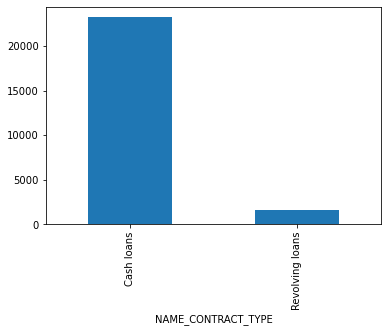

In [66]:
#Let's check the loan types of the defaulters(1)

application.groupby('NAME_CONTRACT_TYPE')['TARGET'].sum().plot.bar()
plt.show()

- From the above it is very well noticed that defaulters of cash loan types & revolving loan types are not very similar in percentages. But the math is [25,000+ defalters vs 2,80,000 loan applicants] & [2000 defaulters vs 29,000 loan applicants] The math approx. is from the univariate & bivatiate analysis of Contract type attribute.

- They are defaulters in similar percentages. 


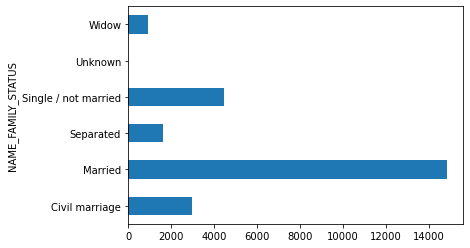

In [67]:
#Let's check the family status of the defaulters(1)

application.groupby('NAME_FAMILY_STATUS')['TARGET'].sum().plot.barh()
plt.show()

- From the above, it is getting difficult to infer. Let's findout through the value counts. 

In [68]:
#Let's check the family status of the defaulters(1) count.

application.groupby('NAME_FAMILY_STATUS')['TARGET'].sum()


NAME_FAMILY_STATUS
Civil marriage           2961
Married                 14850
Separated                1620
Single / not married     4457
Unknown                     0
Widow                     937
Name: TARGET, dtype: int64

In [69]:
# let's check the value counts of the applicants family status.

application.NAME_FAMILY_STATUS.value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

- From the it can be infered that married & the widowed applicants are least in defaulting the loan.

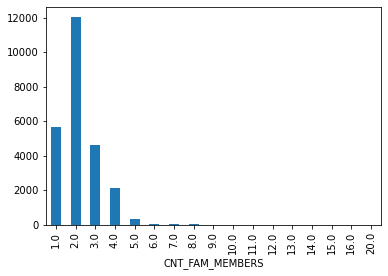

In [70]:
#Let's check the number of family members of the defaulters(1)

application.groupby('CNT_FAM_MEMBERS')['TARGET'].sum().plot.bar()
plt.show()

In [71]:
#Let's check the count of the number of family members of the defaulters(1)

application.groupby('CNT_FAM_MEMBERS')['TARGET'].sum()

#.plot.bar()
#plt.show()

CNT_FAM_MEMBERS
1.0      5675
2.0     12009
3.0      4608
4.0      2136
5.0       327
6.0        55
7.0         6
8.0         6
9.0         0
10.0        1
11.0        1
12.0        0
13.0        1
14.0        0
15.0        0
16.0        0
20.0        0
Name: TARGET, dtype: int64

In [72]:
#Let's check the value counts of the number of family members.

application.CNT_FAM_MEMBERS.value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

- From the above it can be infered that, there are consistently 7-10% defaulters in all types of the families. This can be infered by observing the value counts and the bar graph.

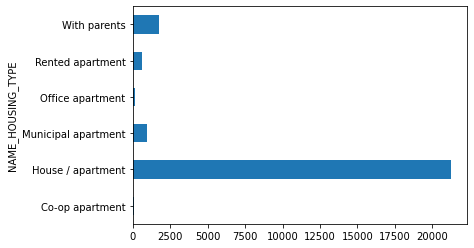

In [73]:
#Let's check the housing type of the defaulters(1)

application.groupby('NAME_HOUSING_TYPE')['TARGET'].sum().plot.barh()
plt.show()

In [74]:
#Let's check the value counts of the housing type of the defaulters(1)

application.groupby('NAME_HOUSING_TYPE')['TARGET'].sum()

NAME_HOUSING_TYPE
Co-op apartment           89
House / apartment      21272
Municipal apartment      955
Office apartment         172
Rented apartment         601
With parents            1736
Name: TARGET, dtype: int64

In [75]:
##Let's check the count of the housing types

application.NAME_HOUSING_TYPE.value_counts()

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

- From the above it can be inferred that, With parents, municipal and Rented apartment - housing type has the highest defaulters. This is by observing the value counts & the graph. Let us confirm this using the segmented analysis.

### Analysis 2

#### Segmented Analysis

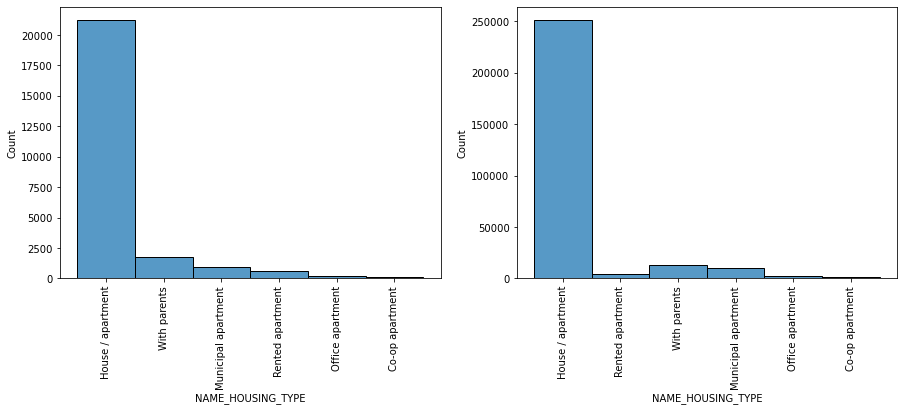

In [76]:
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sns.histplot(application1.NAME_HOUSING_TYPE, bins=50)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.histplot(application0.NAME_HOUSING_TYPE, bins=50)
plt.xticks(rotation=90)
plt.show()

- The aobve confirms that, inference drawn from the bivariate analysis of housing types.

### Analysis 3 

#### Univariate Analysis

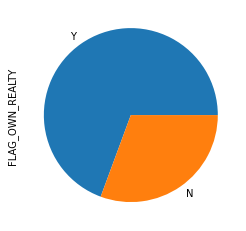

In [77]:
#let us understnad the number of people already owing a house.

application.FLAG_OWN_REALTY.value_counts().plot.pie()
plt.show()

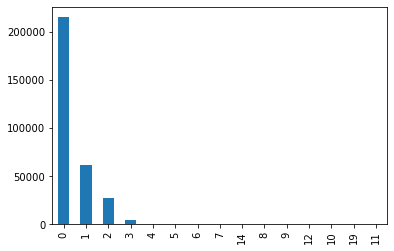

In [78]:
#let us understand the number the number of children of the applicants.

application.CNT_CHILDREN.value_counts().plot.bar()
plt.show()

- Majority of them, do not have children.

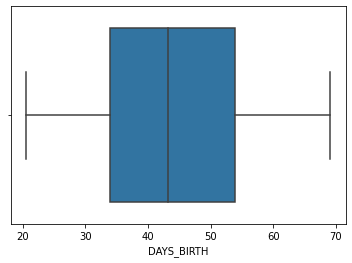

In [79]:
#Let us understand the age spread of the applicants. 

sns.boxplot(application.AGE)
plt.show()

- The median age of the applicants is 42-43 years. 

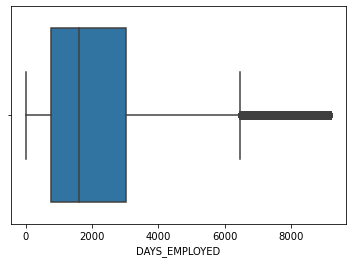

In [80]:
#let's plot the days employed spread using boxplot.

sns.boxplot(application.NEW_WORKEX.DAYS_EMPLOYED)
plt.show()

- The above plot infers that more number of applicants are above the median work exp. It is safer to say people with more work exp tend to seek loans. 

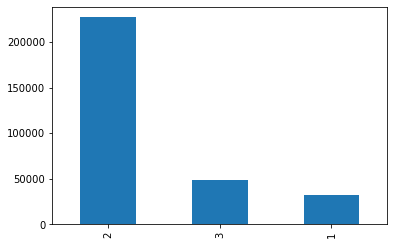

In [81]:
#let's understabd the region ration of the loan applicats.

application.REGION_RATING_CLIENT.value_counts().plot.bar()
plt.show()

- The majority of the applicants are from region which has a rating of 2. 

### Analysis 3

#### Bivariate Analysis 

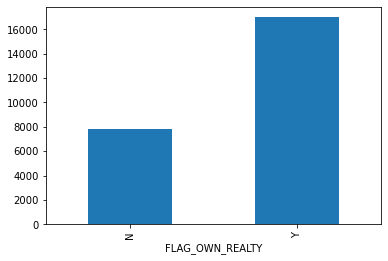

In [82]:
#Let's compare the defaulters(1) owning a reality & not owning a reality.

application.groupby('FLAG_OWN_REALTY')['TARGET'].sum().plot.bar()
plt.show()

In [83]:
#Let's count the defaulters(1) owning a reality & not owning a reality.

application.FLAG_OWN_REALTY.value_counts()

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

- The above shows that owning a reality dose not affect the defaulting factor much. Both types have defaulters less than 10%. Its safer to prefer applicants with own reality which can act as collateral for bank incase if they default the loan. 

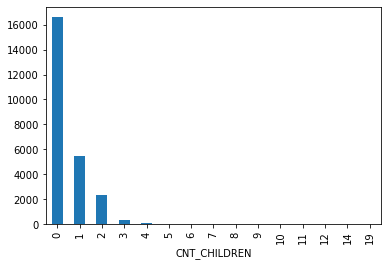

In [84]:
#let us study the count of children among the defaulter.  

application.groupby('CNT_CHILDREN')['TARGET'].sum().plot.bar()
plt.show()

In [85]:
#let check the count of children.

application.CNT_CHILDREN.value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64

- The above shows that count of children dose not affect the defaulting factor much. Applicants with 0,1,2,3 children have defaulters less than 10%.

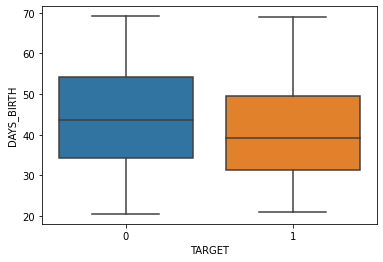

In [86]:
#let us check the age spread for defaulters & non-defaulters.

sns.boxplot(application.TARGET, application.AGE)
plt.show()

- From the above we can infer that, the defaulters median age and the 75%ile of data is less than the non-defaulter. It us safer to assume that older applicants with certain criteria are a safer option than the younger ones. 

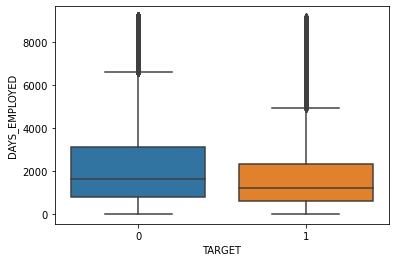

In [87]:
#let us check the work experience spread for defaulters & non-defaulters.

sns.boxplot(application.TARGET, application.NEW_WORKEX.DAYS_EMPLOYED)
plt.show()

- From the above we can infer that, the defaulters median work experience and the 75%ile of data is less than the non-defaulter. It us safer to assume that applicants with more work exp & certain criteria are a safer option than the younger ones. 

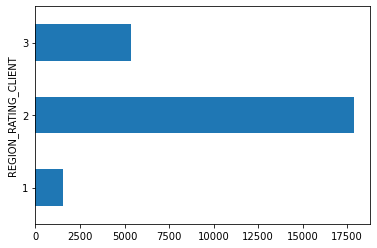

In [88]:
#let us check the region ratings of defaulters & non-defaulters.

application.groupby('REGION_RATING_CLIENT')['TARGET'].sum().plot.barh()
plt.show()

In [89]:
#let us check the value counts of region ratings of defaulters.

application.groupby('REGION_RATING_CLIENT')['TARGET'].sum()

REGION_RATING_CLIENT
1     1552
2    17907
3     5366
Name: TARGET, dtype: int64

In [90]:
#let us check the value counts of region ratings.

application.REGION_RATING_CLIENT.value_counts()

2    226984
3     48330
1     32197
Name: REGION_RATING_CLIENT, dtype: int64

- From the above, by comparing the value counts with the defaulter counts with the total counts. It can be observed that region with rating 3 has more defaulter than 2 & 1. But the not in a significant manner. 

### Analysis 3

#### Segmented Analysis 

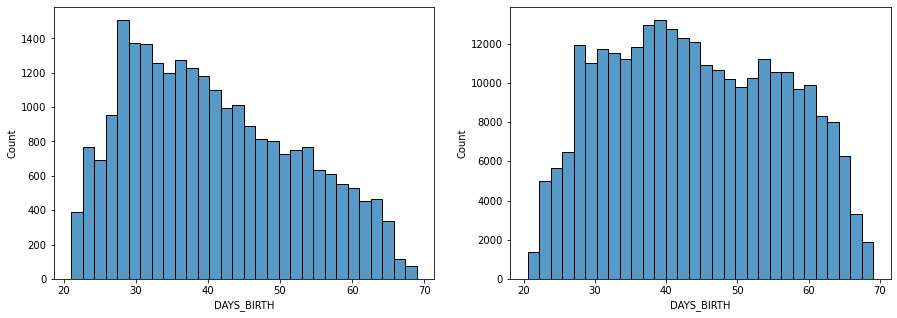

In [91]:
#let us understand the age factor of defaulter & non-defaulters.

plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sns.histplot(application1.DAYS_BIRTH/365, bins=30)
plt.subplot(1,2,2)
sns.histplot(application0.DAYS_BIRTH/365, bins=30)
plt.show()

- As infered from the bivriate analysis, Applicants with less age tend to default. Here you can notice that default rate is hight among applicants with age less 30 years.

### Analysis 4

#### Univariate Analysis

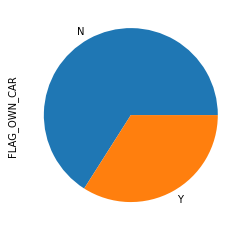

In [92]:
#let us understnad the number of people already owing a car.

application.FLAG_OWN_CAR.value_counts().plot.pie()
plt.show()

- The above observation clearly shows that majority of them do not own a car. 

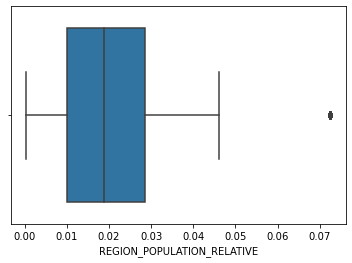

In [93]:
#let us understnad the Relative population of the region.

sns.boxplot(application.REGION_POPULATION_RELATIVE)
plt.show()

<AxesSubplot:xlabel='AMT_GOODS_PRICE'>

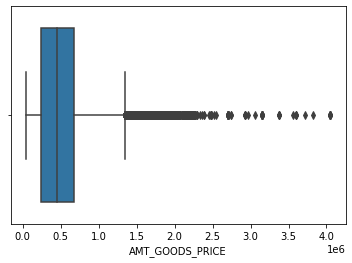

In [94]:
#let us understnad the spread of the prices of the goods being purchased by the applicants.

sns.boxplot(application.AMT_GOODS_PRICE)

- The median value of the prices is very close to 5,00,000. Majorty of the data has price(upper whisker) is less than 15,00,000.

In [95]:
#let us understnad the spread of the registration of the applicant's purchase.
# The DAYS_REGISTRATION has negative values. Let us convert them into asbsoloutes and them plot it. 

application.DAYS_REGISTRATION=application.DAYS_REGISTRATION.abs()

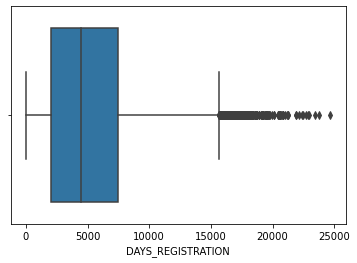

In [96]:
#Boxplot of the spread - DAYS_REGISTRATION

sns.boxplot(application.DAYS_REGISTRATION)
plt.show()

 - The above observation clearly states that the major data (upper whisker) is less than 15,000 days. & 75TH%ile data is less that 10,000 days. i.e., 27 years old. 

In [97]:
#let us understnad the spread of the registration of the applicant's purchase.
# The DAYS_ID_PUBLISH has negative values. Let us convert them into asbsoloutes and them plot it. 

application.DAYS_ID_PUBLISH=application.DAYS_ID_PUBLISH.abs()

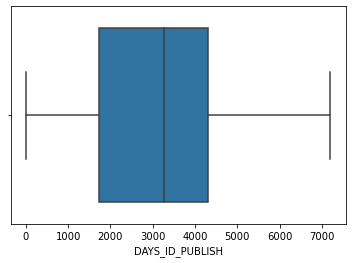

In [98]:
#Boxplot of the spread - DAYS_ID_PUBLISH

sns.boxplot(application.DAYS_ID_PUBLISH)
plt.show()

- The above observation clearly states that the major data (75th%ile) is less than 5,000 days. i.e., ~14 years old. 

### Analysis 4

#### Bivariate Analysis 

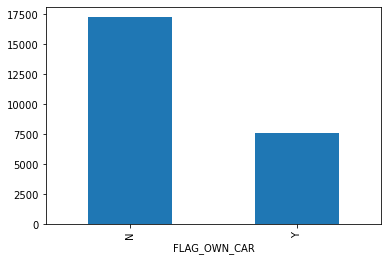

In [99]:
#let us check the Own car status of defaulters.

application.groupby('FLAG_OWN_CAR')['TARGET'].sum().plot.bar()
plt.show()

In [100]:
#let us check the count of own car status of applicants.

application.FLAG_OWN_CAR.value_counts()

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

- From the above observation of defaulter graph and the value counts, the percentage of the defaulters are less with applicants who owns the car when compared with the % of defaulters who don't own the car. 

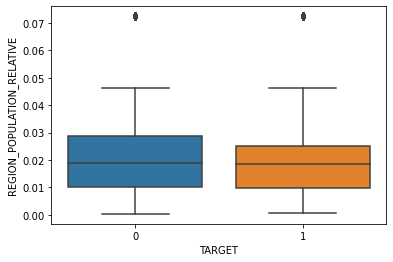

In [101]:
#let's try to understand if there is any insight on the defaulters based on the relative population.

sns.boxplot(application.TARGET, application.REGION_POPULATION_RELATIVE)
plt.show()

- The above plot is not giving us any kind of insight. The spread for the defaulter and non-defaulter is very similar. 

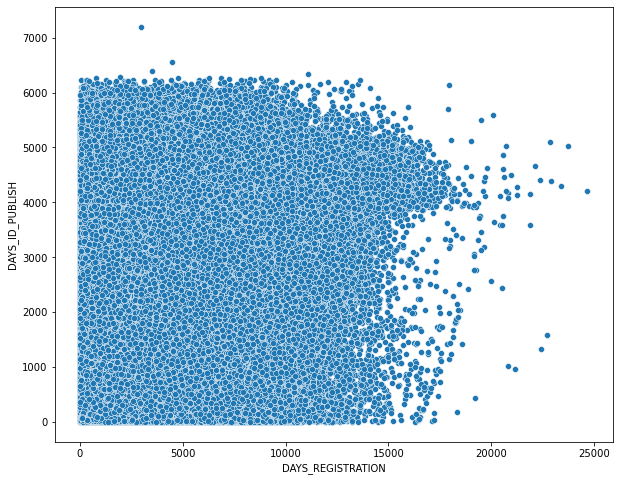

In [102]:
#let us plot a scatterplot between the registration days and the published Id days 
#To check if there is any corrolation.

plt.figure(figsize=[10,8])
sns.scatterplot(application.DAYS_REGISTRATION, application.DAYS_ID_PUBLISH)
plt.show()

- The above data clearly shows that they are not corrolated. It seems like there is no relation between the registration days and published day. 

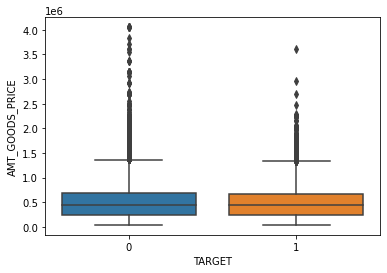

In [103]:
#let's try to understand if there is any insight on the defaulters based on the Goods price.

sns.boxplot(application.TARGET, application.AMT_GOODS_PRICE)
plt.show()


- The above data clearly shows that they are not corrolated. It seems like there is no relation between the goods price & the defaulting of the loan. Let us see if we can findout something in segmented analysis.

### Analysis 4

#### Segmented Analysis 

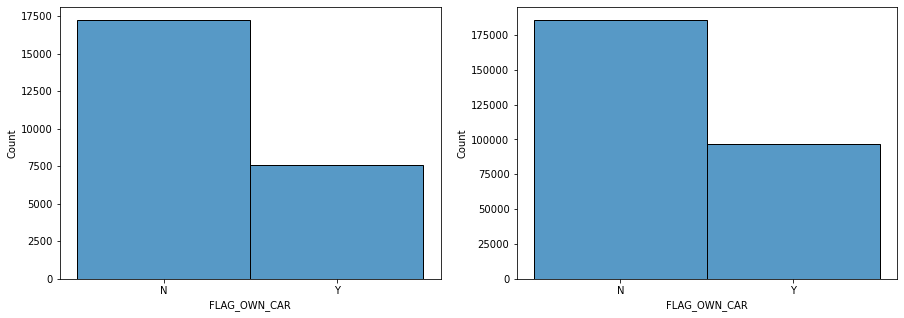

In [104]:
#let us understand *more* on the owning a car effect on the applicants.

plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sns.histplot(application1.FLAG_OWN_CAR)
plt.subplot(1,2,2)
sns.histplot(application0.FLAG_OWN_CAR)
plt.show()

- As discussed above in the bivariate analysis, the percentage of the defaulters are less with applicants who owns the car when compared with the % of defaulters who don't own the car. 

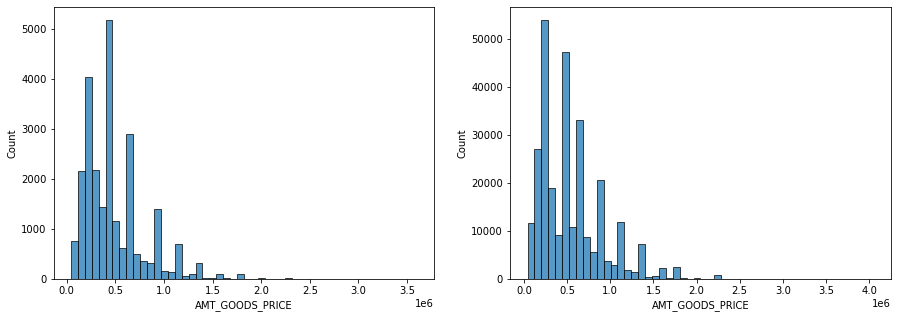

In [105]:
#let us understand the goods price factor of defaulter & non-defaulters.

plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sns.histplot(application1.AMT_GOODS_PRICE, bins=50)
plt.subplot(1,2,2)
sns.histplot(application0.AMT_GOODS_PRICE, bins=50)
plt.show()

- Contrast to bivariate analysis, Here we can say that applicants with goofd price close to 5,00,000 are the highest  number in defaulters as compared to overall.

### Analysis - 5

#### Univariate Analysis

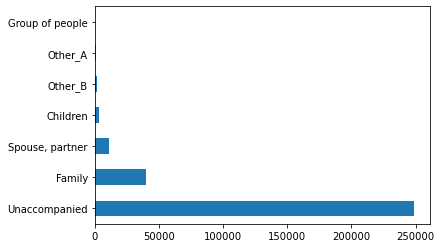

In [106]:
#let us understnad who is accompanying the applicant during the process. 

application.NAME_TYPE_SUITE.value_counts().plot.barh()
plt.show()

- It turns out to be majority of them are not accompained by anyone. 

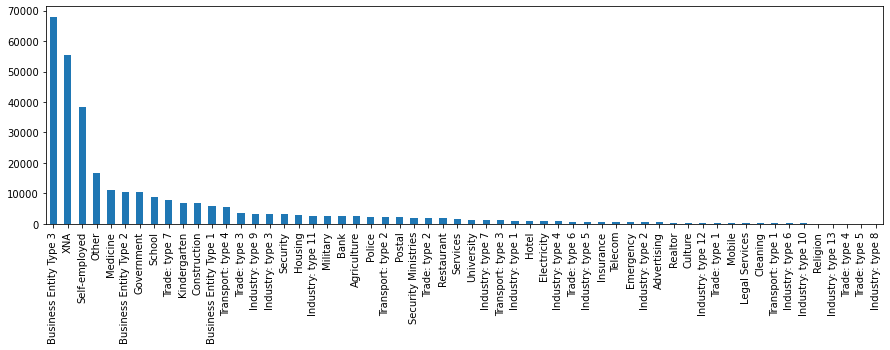

In [107]:
# let us try and understnad where the applicants mostly working. 

plt.figure(figsize=[15,4])
application.ORGANIZATION_TYPE.value_counts().plot.bar()
plt.show()

- Most of the applicants work in 'Business Entity Type 3'. This should help us in marketing or deciding to make the process easier for this type of organization.

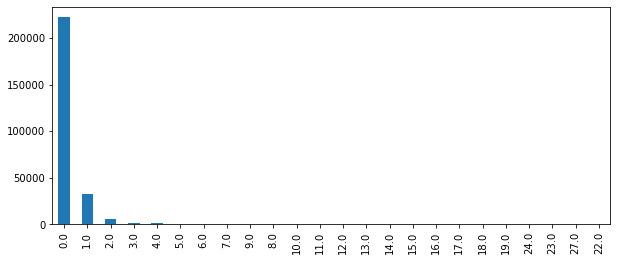

In [108]:
# let us try and understnad how many enquires are made to the credit bureau in a month.
#This will tell us how many others places/banks have reqested his details to check their credibility.  

plt.figure(figsize=[10,4])
application.AMT_REQ_CREDIT_BUREAU_MON.value_counts().plot.bar()
plt.show()

In [109]:
# Let's do the value counts for better clarity.

application.AMT_REQ_CREDIT_BUREAU_MON.value_counts()

0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
23.0         1
27.0         1
22.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

- If 2 or more that 2 requests are considered as a red flag, then above shows that a very little number of applicants's details have been requested twice or more. There approx. 10,000 of such applicants.

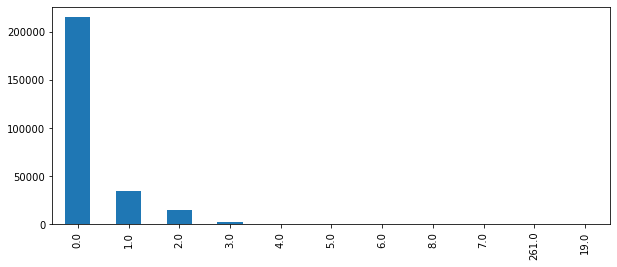

In [110]:
# let us try and understnad how many enquires are made to the credit bureau in a quater.
#This will tell us how many others places/banks have reqested his details to check their credibility.  

plt.figure(figsize=[10,4])
application.AMT_REQ_CREDIT_BUREAU_QRT.value_counts().plot.bar()
plt.show()

In [111]:
# Let's do the value counts for better clarity.

application.AMT_REQ_CREDIT_BUREAU_QRT.value_counts()

0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
8.0           7
7.0           7
261.0         1
19.0          1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

- If 2 or more that 2 requests are considered as a red flag, then above shows that a very little number of applicants's details have been requested twice or more. There approx. 16,000 of such applicants.

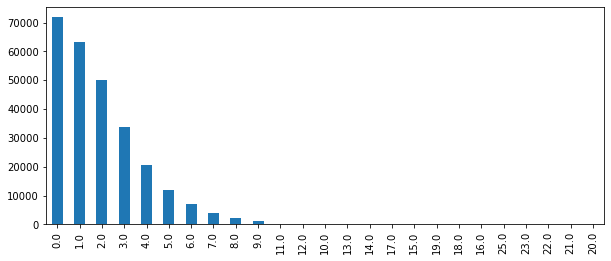

In [112]:
# let us try and understnad how many enquires are made to the credit bureau in a year.
#This will tell us how many others places/banks have reqested his details to check their credibility.  

plt.figure(figsize=[10,4])
application.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts().plot.bar()
plt.show()

In [113]:
# Let's do the value counts for better clarity.

application.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts()

0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
25.0        1
23.0        1
22.0        1
21.0        1
20.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

 - If 5 or more that 5 requests are considered as a red flag in a year, then above shows that a very little number of applicants's details have been requested twice or more. There approx. 14,000 of such applicants.

### Analysis 5

#### Bivariate Analysis 

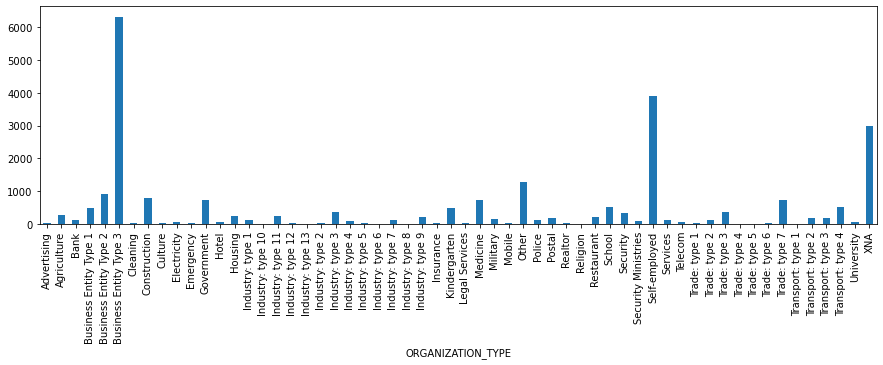

In [114]:
plt.figure(figsize=[15,4])
application.groupby('ORGANIZATION_TYPE')['TARGET'].sum().plot.bar()
plt.show()

In [115]:
application.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

- Form the above graph and the value count. If they are closely observed. There approximately 10% defaulters from the top two types. Business Entity 3 & Self Employed.

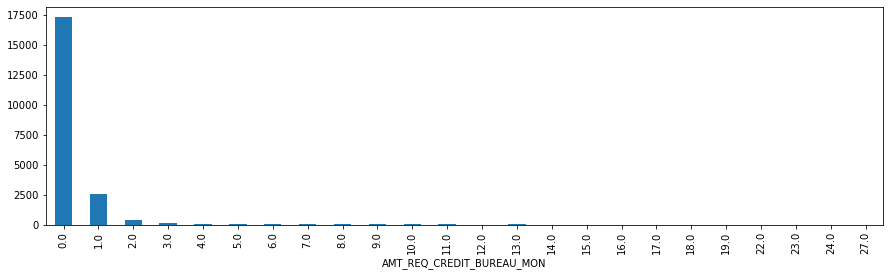

In [116]:
# lets plot the defaulter among the credit bureau requests.

plt.figure(figsize=[15,4])
application.groupby('AMT_REQ_CREDIT_BUREAU_MON')['TARGET'].sum().plot.bar()
plt.show()

In [117]:
# Let's do the value counts for better clarity.

application.AMT_REQ_CREDIT_BUREAU_MON.value_counts()

0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
23.0         1
27.0         1
22.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

- The above graph and the value counts elstablishes that there is no corrlation between the the credit request made and the defaulters. As there are close 7-8% of the the defaulters across credit requests - 0,1,2,3,4,5. 

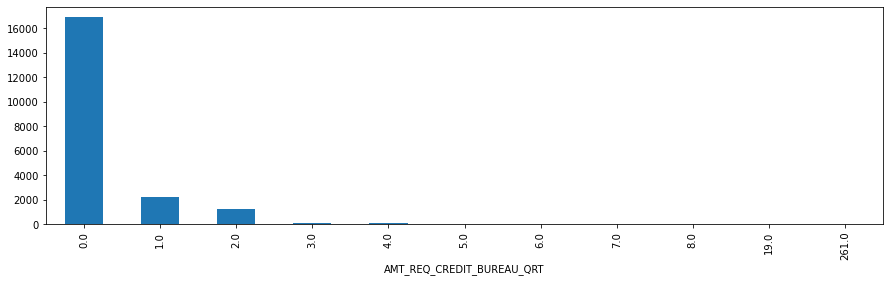

In [118]:
# lets plot the defaulter among the credit bureau requests for quater.

plt.figure(figsize=[15,4])
application.groupby('AMT_REQ_CREDIT_BUREAU_QRT')['TARGET'].sum().plot.bar()
plt.show()

In [119]:
# Let's do the value counts for better clarity.

application.AMT_REQ_CREDIT_BUREAU_QRT.value_counts()

0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
8.0           7
7.0           7
261.0         1
19.0          1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

- The above graph and the value counts elstablishes that there is no corrlation between the the credit request made and the defaulters. As there are close 7-8% of the the defaulters across credit requests - 0,1,2,3,4,5. 

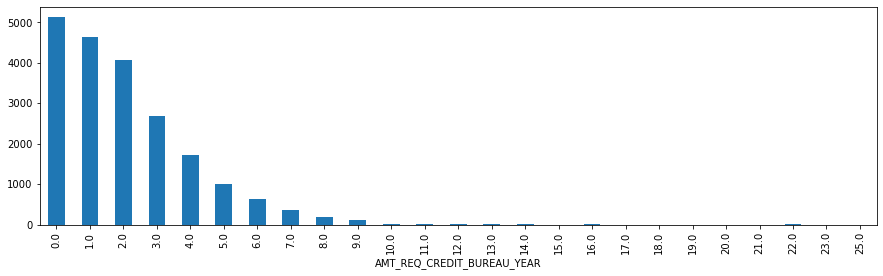

In [120]:
# lets plot the defaulter among the credit bureau requests for year.

plt.figure(figsize=[15,4])
application.groupby('AMT_REQ_CREDIT_BUREAU_YEAR')['TARGET'].sum().plot.bar()
plt.show()

In [121]:
# Let's do the value counts for better clarity.

application.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts()

0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
25.0        1
23.0        1
22.0        1
21.0        1
20.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

- The above graph and the value counts elstablishes that there is no corrlation between the the credit request made and the defaulters. As there are close 7-8% of the the defaulters across credit requests - 0,1,2,3,4,5. 

### Analysis 5

#### Segmented Analysis.

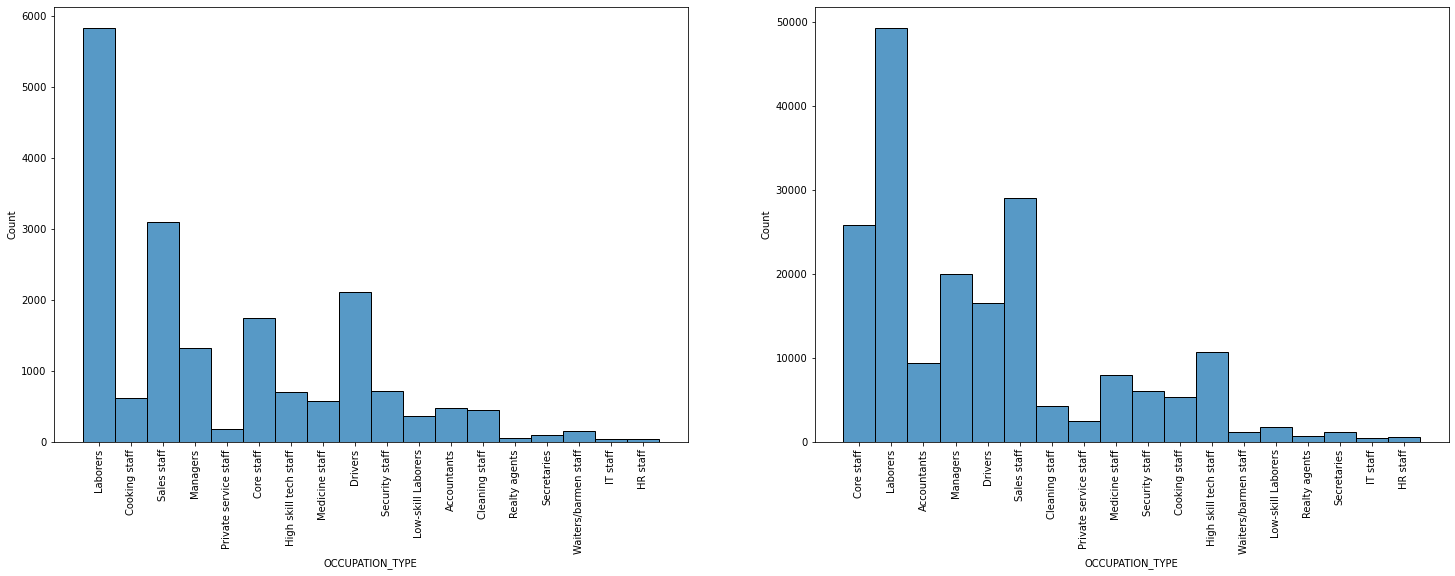

In [122]:
# let us compare the occupation types for the defaulter & non-defaulters

plt.figure(figsize=[25,8])
plt.subplot(1,2,1)
sns.histplot(application1.OCCUPATION_TYPE, bins=20)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.histplot(application0.OCCUPATION_TYPE, bins=20)
plt.xticks(rotation=90)
plt.show()

- The above graph clearly states that, Labourers are the highest in applicants but, they are also highest in the % defaulters. Labourers - occupation has more than 10% defaulters where as less than 10% defaulters in other types. 

## Corrolation Martix

In [123]:
# Let us find the corrolation matrix with the important drivers. 
# The key important drivers are - income, loan amount, work experience, age, family.

corrolation=application[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'DAYS_EMPLOYED', 'DAYS_BIRTH', 'CNT_FAM_MEMBERS']].corr()
corrolation

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,DAYS_EMPLOYED,DAYS_BIRTH,CNT_FAM_MEMBERS
AMT_INCOME_TOTAL,1.000000,0.156870,0.191657,-0.063835,-0.027261,0.016342
AMT_CREDIT,0.156870,1.000000,0.770138,-0.064319,0.055436,0.063160
AMT_ANNUITY,0.191657,0.770138,1.000000,-0.102851,-0.009445,0.075539
DAYS_EMPLOYED,-0.063835,-0.064319,-0.102851,1.000000,0.623941,-0.234365
DAYS_BIRTH,-0.027261,0.055436,-0.009445,0.623941,1.000000,-0.278894
CNT_FAM_MEMBERS,0.016342,0.063160,0.075539,-0.234365,-0.278894,1.000000


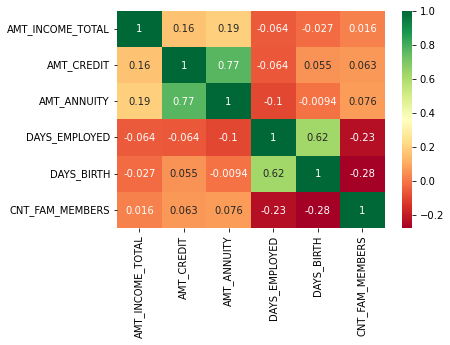

In [124]:
#let's build the heat map of the corr matrix. 

sns.heatmap(corrolation, annot=True, cmap='RdYlGn')
plt.show()

- From the above we can find the obvious corrolation between loan amount & the loan annuity, and age & work experience. If you can deeply notice. You will find that there is almost zero corrolation between Income & Target as it is not a continious data. 

## Previous_data Dataset Analysis

#### Understnad the dataset by loading & various action. 

- Perfom the analysis. Pick 5 variables/attributes and perform the univariate, bivariate & segmented univariate analysis. 

##### The findings are mentioned after every analysis. 

In [125]:
#Load the dataset using the csv file & gothrough the meta deta of the dataset using info() function.

previous_application=pd.read_csv('/Users/saisharan/Downloads/previous_application - risk analysis.csv')
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [126]:
# find out the shape of the data set

previous_application.shape

(1670214, 37)

In [127]:
# preview the dataset.

previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


#### Identify the missing values in the colums. 

In [128]:
previous_application.isna().sum()/1670214*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

 - As I can notice there are many columns with missing data upto 50 -99%. I a going to have a threshold of 40% and drop the columns containing more than 40% of null values.

#### Drop the columns where the values are missing more than 40%.(40% is my threshold value)

In [129]:
#calculating the 40% of the column values

668100/1670214*100

40.00086216496808

In [130]:
#calculating the threshold number.

1670214-668100

1002114

In [131]:
# Dropping the columns with missing values more than 40%

previous=previous_application.dropna(thresh=1002114, axis=1)

In [132]:
# Findout the shape of the 'previous' dataframe.

previous.shape

(1670214, 26)

In [133]:
#check and confirm the null values in the columns. 

previous.isna().sum()/1670214*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP

#### Identify the outliers and should be mindful about them. 

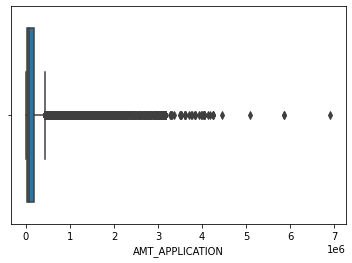

In [134]:
#let us plot the spread of amount requested by the applicant.

sns.boxplot(previous.AMT_APPLICATION)
plt.show()

In [135]:
#As there are outliers, let us understand the data using the quantile function. 

previous.AMT_APPLICATION.quantile([0.5, 0.75, 0.85, 0.9, 0.95, 0.99, 1.0])

0.50      71046.000
0.75     180360.000
0.85     325760.283
0.90     450000.000
0.95     787500.000
0.99    1350000.000
1.00    6905160.000
Name: AMT_APPLICATION, dtype: float64

- From the above it can be noted that 95%ile of the data is 7,87,000. We can consider the data till this point inorder to not affect the analysis.

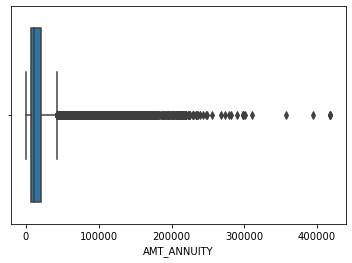

In [136]:
#let us plot the spread of amount amount annuity of the credit.

sns.boxplot(previous.AMT_ANNUITY)
plt.show()

In [137]:
#As there are outliers, let us understand the data using the quantile function. 

previous.AMT_ANNUITY.quantile([0.5, 0.75, 0.85, 0.9, 0.95, 0.99, 1.0])

0.50     11250.0000
0.75     20658.4200
0.85     27896.9805
0.90     34703.8200
0.95     45336.7800
0.99     69685.7886
1.00    418058.1450
Name: AMT_ANNUITY, dtype: float64

- From the above it can be noted that 99%ile of the data is 69,685. We can consider the data till this point inorder to not affect the analysis.

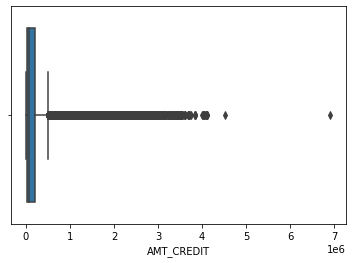

In [138]:
#let us plot the spread of credit offered to the applicant.

sns.boxplot(previous.AMT_CREDIT)
plt.show()

In [139]:
#As there are outliers, let us understand the data using the quantile function. 

previous.AMT_CREDIT.quantile([0.5, 0.75, 0.85, 0.9, 0.95, 0.99, 1.0])

0.50      80541.0
0.75     216418.5
0.85     383193.0
0.90     533160.0
0.95     886500.0
0.99    1515377.7
1.00    6905160.0
Name: AMT_CREDIT, dtype: float64

- From the above it can be noted that 95%ile of the data is 8,86,500. We can consider the data till this point inorder to not affect the analysis.

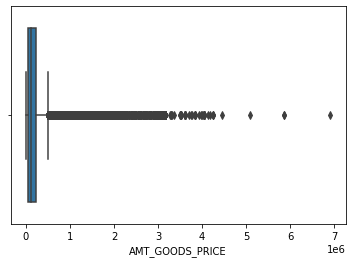

In [140]:
#let us plot the spread of goods price the applicants.

sns.boxplot(previous.AMT_GOODS_PRICE)
plt.show()

In [141]:
#As there are outliers, let us understand the data using the quantile function. 

previous.AMT_GOODS_PRICE.quantile([0.5, 0.75, 0.85, 0.9, 0.95, 0.99, 1.0])

0.50     112320.0
0.75     234000.0
0.85     450000.0
0.90     585000.0
0.95     900000.0
0.99    1395000.0
1.00    6905160.0
Name: AMT_GOODS_PRICE, dtype: float64

- From the above it can be noted that 95%ile of the data is 9,00,000. We can consider the data till this point inorder to not affect the analysis.

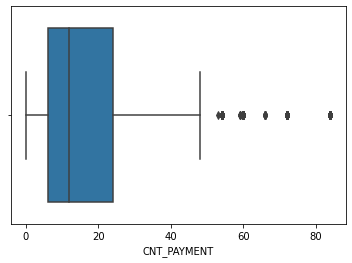

In [142]:
#let us plot the spread of counts of the paymennts.

sns.boxplot(previous.CNT_PAYMENT)
plt.show()

- From the above it can be noted that most of the data is within the whisker and only few of the are outliers. We can ignore them for the analysis.

#### Univariate Analysis

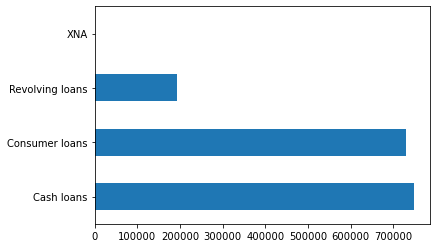

In [143]:
#let us understand amount of people in each contract type.

previous.NAME_CONTRACT_TYPE.value_counts().plot.barh()
plt.show()

- From the above it is evident that most of the loans are cash & consumer loans. 

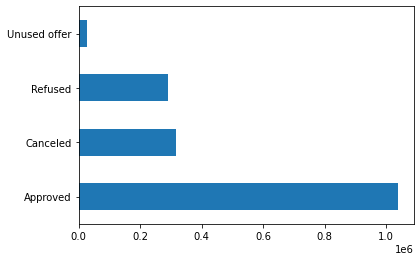

In [144]:
# Let us understand the type of contract statuses and the visualize the count.

previous.NAME_CONTRACT_STATUS.value_counts().plot.barh()
plt.show()

- When an offer is made, most of them use. here, close to 60% have them have used the offer. The next majority chunk of them is cancelled 25% of the applicants are being rejected. 

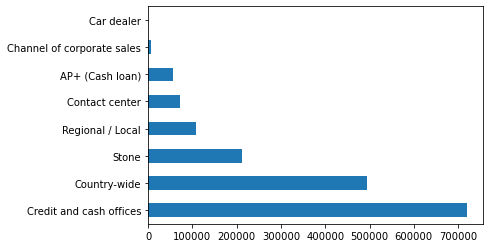

In [145]:
#Let us understand the source of the applications. From where they are approaching us. Which channel?

previous.CHANNEL_TYPE.value_counts().plot.barh()
plt.show()

- This is a very good insight. Most of the applicants are coming from 'Credit & Cash offices' & 'Country wide'. They can target the marketing on these segments.

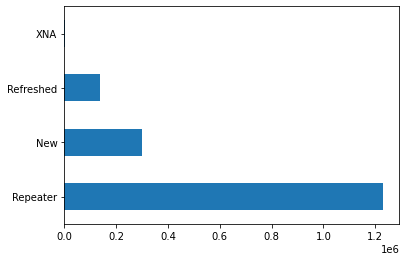

In [146]:
#What type of client are applying for the credit.

previous.NAME_CLIENT_TYPE.value_counts().plot.barh()
plt.show()

- This is an interesting insight. Majority of the applicants are repeater. The Credit company has good retention ratio. As this is going good, you can start focussing more on new clientele.

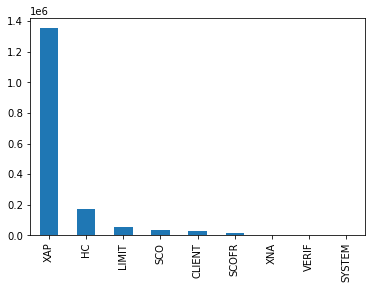

In [147]:
#Let us understand the reasons why the application has been rejected. 

previous.CODE_REJECT_REASON.value_counts().plot.bar()
plt.show()

- The majority of the applicants are rejected because of 'XAP'. while the next two reasons are 'HC' & 'Limit'

#### Bivariate Analysis

In [148]:
# Let us analyse the contract status and the credited offered attributes. 
# from the above we know that AMT_CREDIT has the outliers. Lets fix the outliers first. Lets use the 95%ile as the cap.

previous_AMTCRT=previous[previous.AMT_CREDIT<=900000.0]

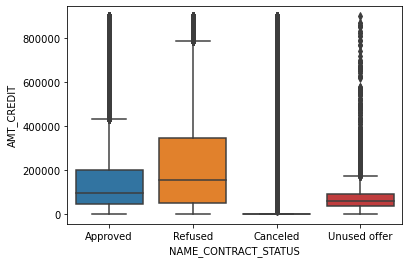

In [149]:
#Lets plot the spread now. 

sns.boxplot(previous_AMTCRT.NAME_CONTRACT_STATUS, previous_AMTCRT.AMT_CREDIT)
plt.show()

- If you notice the above graph, the refused offer has highest Request. The credit company might be refusing the offers beyond a certain number. 
- Where the credit company offered lower credit for certain applicants, and those offeres were not used.

In [150]:
# Let us analyse the contract status and the anunity attributes. 
# from the above we know that annuity has the outliers. Lets fix the outliers first. Lets use the 99%ile as the cap.

previous_AMTANN=previous[previous.AMT_ANNUITY<=70000.0]

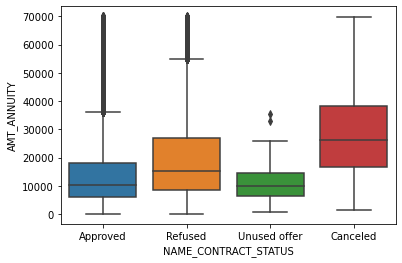

In [151]:
#Lets plot the spread now. 

sns.boxplot(previous_AMTANN.NAME_CONTRACT_STATUS, previous_AMTANN.AMT_ANNUITY)
plt.show()

- If you notice the above graph, the cancelled offer has highest annuity. The credit company might be cancelling the offers beyond a certain number. 
- Where the credit company offered lower annuity, those offeres were not used.

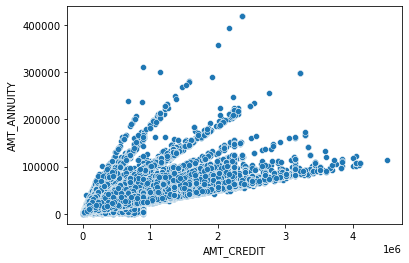

In [152]:
# Let us analyse the relation between credit amount and the anunity attributes. 

sns.scatterplot(previous.AMT_CREDIT, previous.AMT_ANNUITY)
plt.show()

- The plot shows that, they have a very close linear relationship with each other. This is the appropriate way to have the relationship between them. But it is not perfectly linear. 

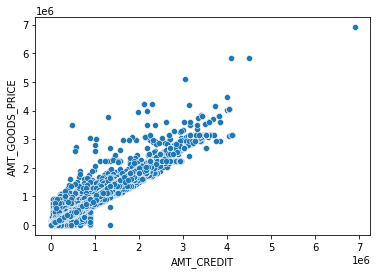

In [153]:
# Let us analyse the relation between credit amount and the price of the goods attributes. 

sns.scatterplot(previous.AMT_CREDIT, previous.AMT_GOODS_PRICE)
plt.show()

- The plot shows that, they have a very close linear relationship with each other. This is the appropriate way to have the relationship between them. But, there are some outliers in considerable amout.We need to study further to understand that in detail

In [154]:
# Let us analyse the contract status and the goods price attributes. 
# from the above we know that goods price has the outliers. Lets fix the outliers first. Lets use the 99%ile as the cap.

previous_AMTANN=previous[previous.AMT_GOODS_PRICE<=900000.0]

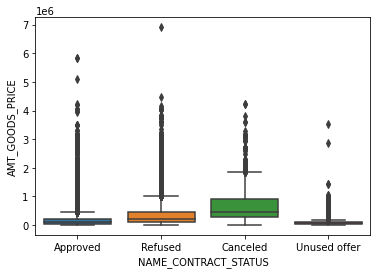

In [155]:
# Let us analyse the relation between credit amount and the  attributes. 

sns.boxplot(previous.NAME_CONTRACT_STATUS, previous.AMT_GOODS_PRICE)
plt.show()

- If you notice the above graph, the cancelled offer has highest price. The credit company might be cancelling the offers beyond a certain number. 
- Where the credit company offered lower price, those offeres were not used.

#### Segmented Analysis

In [156]:
#Let's create the segments of the dataframe based on the contract status of the applicants.

previous_approved=previous[previous.NAME_CONTRACT_STATUS=='Approved']
previous_canceled=previous[previous.NAME_CONTRACT_STATUS=='Canceled']
previous_refused=previous[previous.NAME_CONTRACT_STATUS=='Refused']
previous_Unused=previous[previous.NAME_CONTRACT_STATUS=='Unused offer']

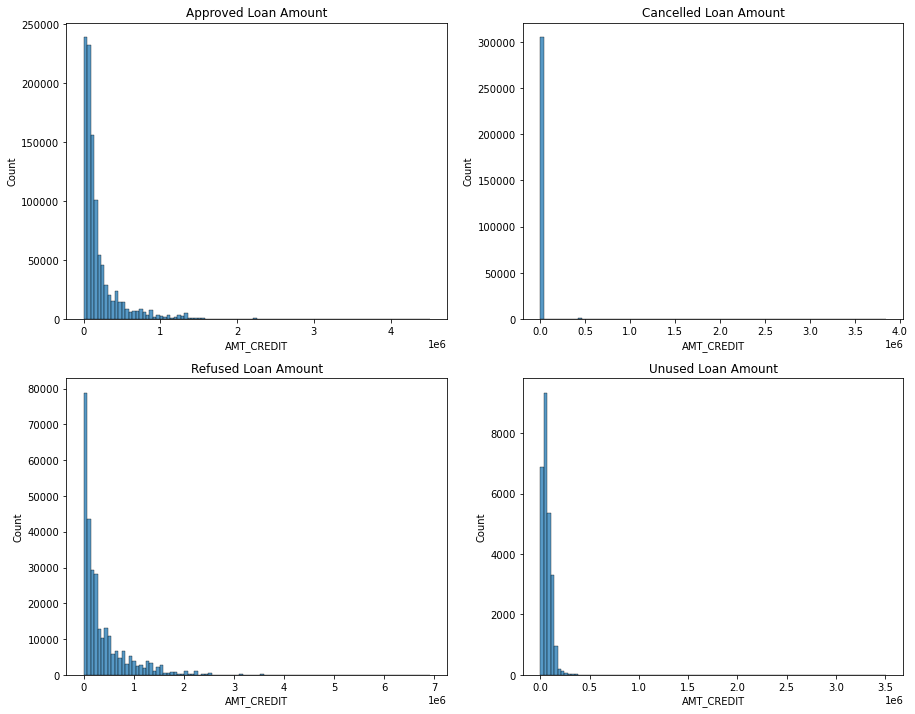

In [157]:
#As the segmented dataframe is ready, let plot credit amount on all the segments.

plt.figure(figsize=[15,12])
plt.subplot(2,2,1)
sns.histplot(previous_approved.AMT_CREDIT, bins=100)
plt.title('Approved Loan Amount')
plt.subplot(2,2,2)
sns.histplot(previous_canceled.AMT_CREDIT, bins=100)
plt.title('Cancelled Loan Amount')
plt.subplot(2,2,3)
sns.histplot(previous_refused.AMT_CREDIT, bins=100)
plt.title('Refused Loan Amount')
plt.subplot(2,2,4)
sns.histplot(previous_Unused.AMT_CREDIT, bins=100)
plt.title('Unused Loan Amount')
plt.show()

- From the above it can be noted that approved laons are majorly less than 10,00,000 & Unused loans are less than 5,00,00

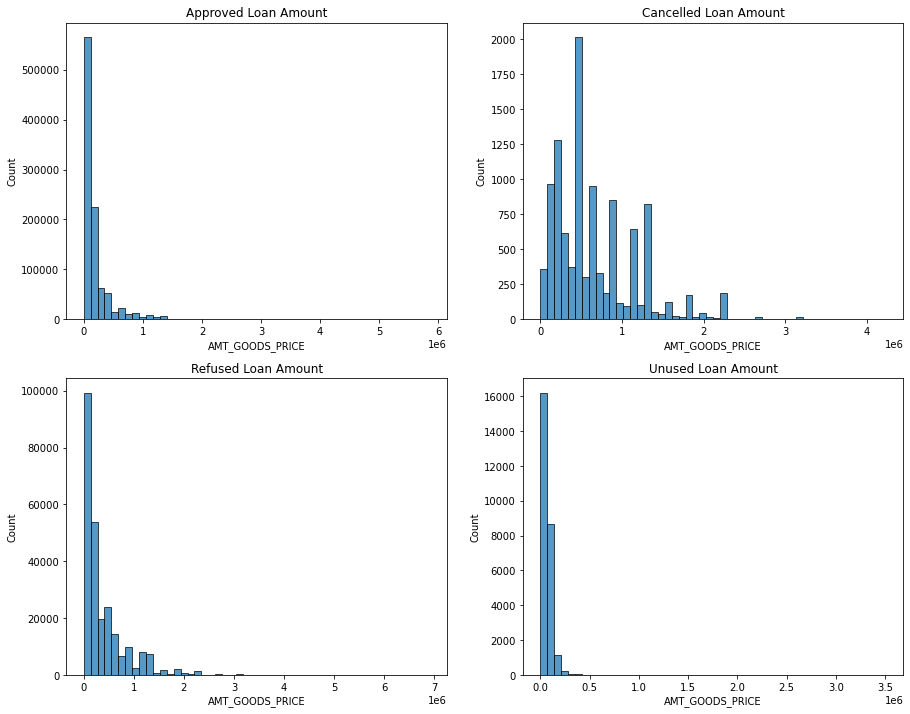

In [158]:
plt.figure(figsize=[15,12])
plt.subplot(2,2,1)
sns.histplot(previous_approved.AMT_GOODS_PRICE, bins=50)
plt.title('Approved Loan Amount')
plt.subplot(2,2,2)
sns.histplot(previous_canceled.AMT_GOODS_PRICE, bins=50)
plt.title('Cancelled Loan Amount')
plt.subplot(2,2,3)
sns.histplot(previous_refused.AMT_GOODS_PRICE, bins=50)
plt.title('Refused Loan Amount')
plt.subplot(2,2,4)
sns.histplot(previous_Unused.AMT_GOODS_PRICE, bins=50)
plt.title('Unused Loan Amount')
plt.show()

- If you can notice the cancelled loans are the loan seeking the highest credit among all the contract statues. 

## Merging the Dataframe 

In [159]:
# Merging the dataframe using the merge function. 

Merged_DataFrame=pd.merge(application, previous, on='SK_ID_CURR',  how='inner')

In [160]:
# Check the shape of the dataframe.

Merged_DataFrame.shape

(1413701, 74)

In [161]:
# Get the info of the data frame using the info function()

Merged_DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 74 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   SK_ID_CURR                    1413701 non-null  int64  
 1   TARGET                        1413701 non-null  int64  
 2   NAME_CONTRACT_TYPE_x          1413701 non-null  object 
 3   CODE_GENDER                   1413701 non-null  object 
 4   FLAG_OWN_CAR                  1413701 non-null  object 
 5   FLAG_OWN_REALTY               1413701 non-null  object 
 6   CNT_CHILDREN                  1413701 non-null  int64  
 7   AMT_INCOME_TOTAL              1413701 non-null  float64
 8   AMT_CREDIT_x                  1413701 non-null  float64
 9   AMT_ANNUITY_x                 1413608 non-null  float64
 10  AMT_GOODS_PRICE_x             1412493 non-null  float64
 11  NAME_TYPE_SUITE               1410175 non-null  object 
 12  NAME_INCOME_TYPE            

- As the above dataframe is already got checked for the missing values & the outliers. Let's directly do the Bivariate analysis. 


### Bivariate Analysis on the Merged Data. 

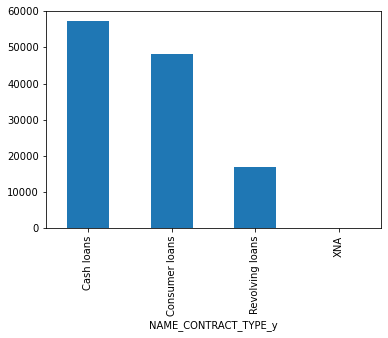

In [162]:
#let us analyse the count of the defaulters with the type of the contract.

Merged_DataFrame.groupby(Merged_DataFrame.NAME_CONTRACT_TYPE_y)['TARGET'].sum().plot.bar()
plt.show()

In [163]:
#Let us observe the counts of the data to understand the percentage of defaulters. 

Merged_DataFrame.NAME_CONTRACT_TYPE_y.value_counts() 

Cash loans         626764
Consumer loans     625256
Revolving loans    161368
XNA                   313
Name: NAME_CONTRACT_TYPE_y, dtype: int64

- From the above graph and the value counts, it is clearly observed that cash loan contract type has more % defaulters than others. 

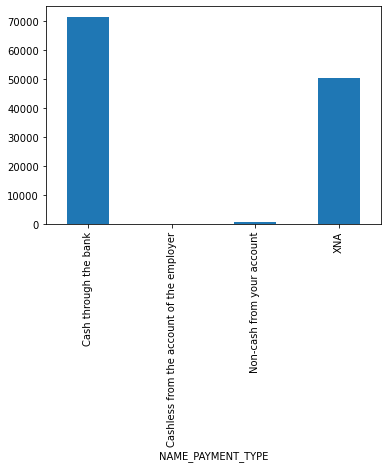

In [164]:
#let us analyse the count of the defaulters with the types of the payment.

Merged_DataFrame.groupby(Merged_DataFrame.NAME_PAYMENT_TYPE)['TARGET'].sum().plot.bar()
plt.show()

In [165]:
#Let us observe the counts of the data to understand the percentage of defaulters. 

Merged_DataFrame.NAME_PAYMENT_TYPE.value_counts()

Cash through the bank                        882700
XNA                                          522960
Non-cash from your account                     7100
Cashless from the account of the employer       941
Name: NAME_PAYMENT_TYPE, dtype: int64

- From the above we can clearly observe that, cash through the bank has highest defaulter. But, the % of defaulters are almost same across all the types. 

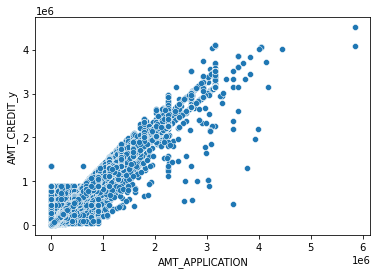

In [166]:
#let us analyse the amount requested by the applicant Vs. credit offered.

sns.scatterplot(Merged_DataFrame.AMT_APPLICATION, Merged_DataFrame.AMT_CREDIT_y)
plt.show()

- Mostly the relationship is linear. but, there are considerable number of outliers where amount requeted is less but offered more credit. There is a need to do further analysis.

In [167]:
#let us analyse the spread of defaulters based on the credit amount. Let us use the credit attribute without containg the outlier.
#from the above we know that AMT_CREDIT has the outliers. Lets fix the outliers first. Lets use the 95%ile as the cap.

Merged_DataFrame_AMTCRT=Merged_DataFrame[Merged_DataFrame.AMT_CREDIT_y<=900000.0]

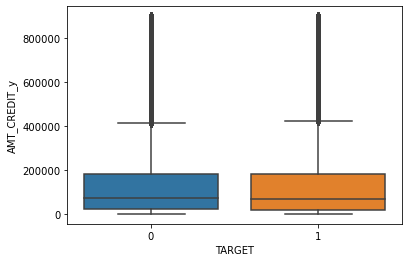

In [168]:
#Let's plot the box plot.

sns.boxplot(Merged_DataFrame.TARGET, Merged_DataFrame_AMTCRT.AMT_CREDIT_y)
plt.show()

- The above does not show any kind of corrolation.

# THE END